In [1]:
#Exersize 1
import numpy as np
a = np.random.random((10,3))
print(a)
b = (np.arange(10),np.abs(a-0.5).argmin(axis=1))
print(a[b])

[[0.77584823 0.21808705 0.35828868]
 [0.17724074 0.29735264 0.07019834]
 [0.11263447 0.97720731 0.59530331]
 [0.15747506 0.14430189 0.63580704]
 [0.60370993 0.24159938 0.55764615]
 [0.96495818 0.08171085 0.87124958]
 [0.58854608 0.00546527 0.9267361 ]
 [0.90601054 0.12610216 0.09451465]
 [0.10103742 0.61650723 0.23239272]
 [0.44912849 0.80086943 0.80649741]]
[0.35828868 0.29735264 0.59530331 0.63580704 0.55764615 0.87124958
 0.58854608 0.12610216 0.61650723 0.44912849]


In [2]:
#Exersize 2
a = np.random.random((6,6))
print(a)
b = (a.sum(axis=1)/a.min(axis=0))
print(b)

[[0.52054087 0.89591538 0.19212261 0.55507548 0.85751929 0.01246598]
 [0.23639976 0.36861898 0.93042152 0.98515072 0.31623005 0.40461071]
 [0.06003669 0.09574601 0.10450782 0.96558627 0.13013553 0.20114437]
 [0.95625817 0.31525149 0.80065872 0.30053942 0.657292   0.7302412 ]
 [0.39608868 0.0668105  0.35680789 0.49804723 0.71263484 0.19823109]
 [0.15025707 0.96929922 0.19963687 0.48179378 0.03780904 0.92241154]]
[ 50.52975725  48.51680463  14.8999054   12.51163997  58.94411757
 221.49950076]


In [3]:
#Exersize 3
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
b = np.array(x[1:][x[:-1]==0])
print(b)
b.max()

[3 0 5]


5

In [4]:
#Exersize 4
x = np.ones(10, dtype=np.int32)
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])
ii = np.unique(i, return_counts = True)
x[ii[0]]+=ii[1]
print(x)

[2 2 2 2 1 4 1 1 2 1]


In [5]:
#Exersize 5
a = np.arange(16).reshape(4, 4)
print(a)
d = {}
for i in range(7):
    d[i]=[a[j][k] for j in range(4) for k in range(4) if j+k==i]
print(d)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
{0: [0], 1: [1, 4], 2: [2, 5, 8], 3: [3, 6, 9, 12], 4: [7, 10, 13], 5: [11, 14], 6: [15]}


Number of clasters: 3
Number of koordinates: 2


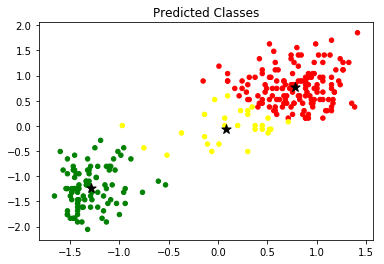

In [16]:
import matplotlib.pyplot as plt

def kmeans(data,centroids):
    copy = centroids-1
    while np.all(copy!=centroids):
        copy = centroids
        dist = [[np.linalg.norm(datas[0:]-centroid[0:]) for datas in data] for centroid in centroids]
        res = np.argmin(dist, axis=0)
        centroids = np.array([np.mean(data[res==i], axis = 0) for i in range(k) if i in res])
    return centroids

def get_labels(data, centroids):
    dist = [[np.linalg.norm(datas[0:]-centroid[0:]) for datas in data] for centroid in centroids]
    labels = np.argmin(dist, axis=0)
    return labels

data = np.loadtxt('faithful.dat', usecols=(1,2))
k = int(input("Number of clasters: "))
n = int(input("Number of koordinates: "))

data=(data-data.mean(axis=0))/data.std(axis=0)

centroids = data[:k]
centroids = kmeans(data, centroids)
labels = get_labels(data, centroids)

plt.scatter(*data.T, c=np.hstack((np.array(["red", "green", "yellow", "black", "blue", "orange"]) for i in range(k//6+1)))[labels], s=20)
plt.scatter(*centroids.T, c=["black"], s=95, marker='*')
plt.title('Predicted Classes')
plt.show()